## Working with XSPEC models

One of the most powerful aspects of **XSPEC** is a huge modeling community. While in 3ML, we are focused on building a powerful and modular data analysis tool, we cannot neglect the need for many of the models thahat already exist in **XSPEC** and thus provide support for them via **astromodels** directly in 3ML. 

For details on installing **astromodels** with **XSPEC** support, visit the 3ML or **astromodels** installation page. 


Let's explore how we can use **XSPEC** spectral models in 3ML. 

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

We do not load the models by default as this takes some time and 3ML should load quickly. However, if you need the **XSPEC** models, they are imported from astromodels like this:

In [1]:
from astromodels.xspec.factory import *

Loading xspec models...done


The models are indexed with *XS_* before the typical **XSPEC** model names.

In [3]:
plaw = XS_powerlaw()
phabs = XS_phabs()
phabs


* description: The phabs model from XSpec (https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/XspecModels.html)
  * formula: $n.a.$
  * parameters: 
    * nh: 
      * value: 1.0
      * desc: (see https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/XspecModels.html)
      * min_value: 0.0
      * max_value: 1000000.0
      * unit: 10**22
      * is_normalization: False
      * delta: 0.001
      * free: True

The spectral models behave just as any other **astromodels** spectral model and can be used in combination with other **astromodels** spectral models.

<IPython.core.display.Javascript object>


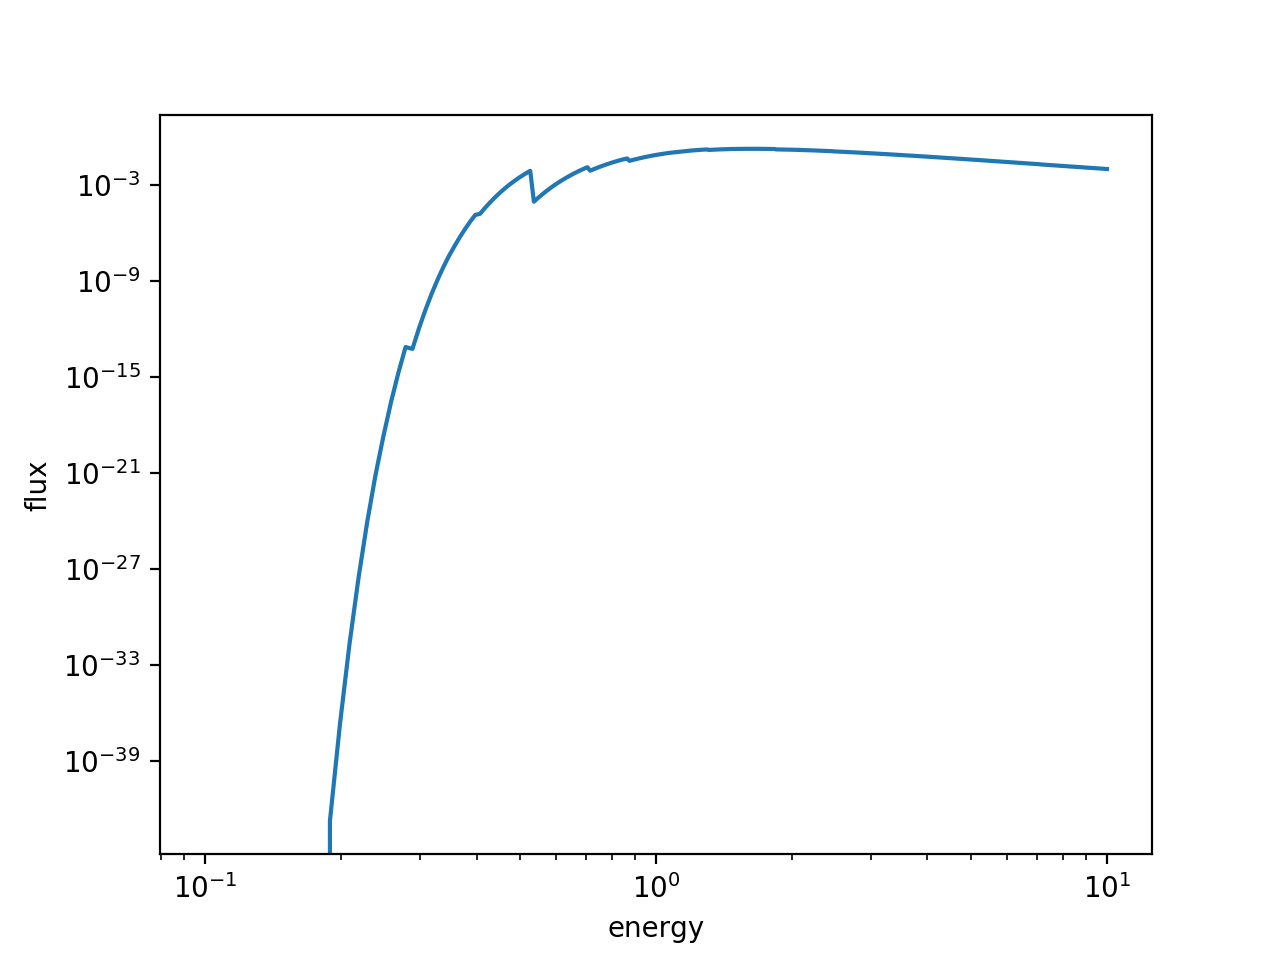

Text(0,0.5,u'flux')

In [11]:
from astromodels import Powerlaw

am_plaw = Powerlaw()

plaw_with_abs = am_plaw*phabs


fig, ax =plt.subplots()

energy_grid = np.linspace(.1,10.,1000)

ax.loglog(energy_grid,plaw_with_abs(energy_grid))
ax.set_xlabel('energy')
ax.set_ylabel('flux')


## XSPEC Settings

Many **XSPEC** models depend on external abundances, cross-sections, and cosmological parameters. We provide an interface to control these directly.

Simply import the **XSPEC** settings like so:

In [12]:
from astromodels.xspec.xspec_settings import *

Calling the functions without arguments simply returns their current settings

In [13]:
xspec_abund()

'angr'

In [14]:
xspec_xsect()

'bcmc'

In [15]:
xspec_cosmo()

(70.0, 0.0, 0.7300000190734863)

To change the settings for abundance and cross-section, provide strings with the normal **XSPEC** naming conventions.

In [18]:
xspec_abund('wilm')
xspec_abund()

'wilm'

In [21]:
xspec_xsect('bcmc')
xspec_xsect()

'bcmc'

To alter the cosmological parameters, one passes either the parameters that should be changed, or all three:

In [22]:
xspec_cosmo(H0=68.)
xspec_cosmo()

(68.0, 0.0, 0.7300000190734863)

In [23]:
xspec_cosmo(H0=68.,q0=.1,lambda_0=70.)
xspec_cosmo()

(68.0, 0.10000000149011612, 70.0)